In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('Position_Salaries.csv')
X = df.iloc[:,1:-1].values
y = df.iloc[:, -1].values

In [2]:
print(X)
print(y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [3]:
y = y.reshape(len(y),1)
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Feature Scaling

In [4]:
from sklearn.preprocessing import StandardScaler
ss_x = StandardScaler()
ss_y = StandardScaler()
X = ss_x.fit_transform(X)
y = ss_y.fit_transform(y)

In [5]:
print(f'X: {X}')
print(f'y: {y}')

X: [[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]
y: [[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Apply SVR to whole Dataset

In [6]:
from sklearn.svm import SVR
ep = 0.1
regressor = SVR(kernel='rbf', epsilon= ep).fit(X,y)

c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [7]:
y_pred_scaled = regressor.predict(ss_x.transform([[6.5]]))
print(y_pred_scaled)

[-0.27861589]


In [8]:
y_pred = ss_y.inverse_transform(y_pred_scaled.reshape(-1,1))
print(y_pred)

[[170370.0204065]]


### Ploting the SVR Model Results

In [9]:
y_pred_all_scaled = regressor.predict(X)
y_pred_all_scaled = y_pred_all_scaled.reshape(-1,1)
upper_margin_scaled = y_pred_all_scaled + ep
lower_margin_scaled = y_pred_all_scaled - ep
y_pred_all = ss_y.inverse_transform(y_pred_all_scaled)

upper_margin = ss_y.inverse_transform(upper_margin_scaled)
lower_margin = ss_y.inverse_transform(lower_margin_scaled)

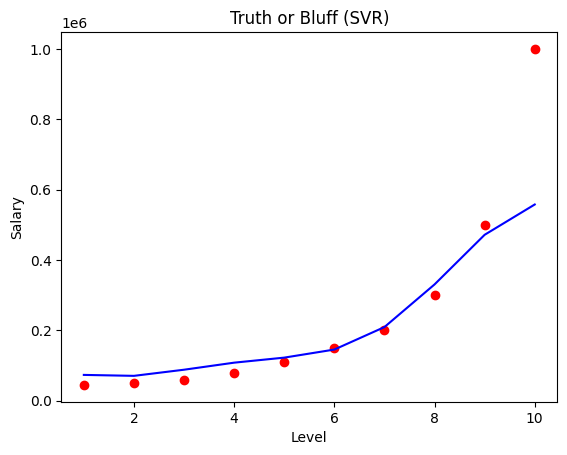

In [10]:
plt.scatter(ss_x.inverse_transform(X), ss_y.inverse_transform(y), color = 'red')
plt.plot(ss_x.inverse_transform(X), y_pred_all, color = 'blue', label='SVR regression line')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.title('Truth or Bluff (SVR)')
plt.show()

#### SVR Hyperplane Curve 

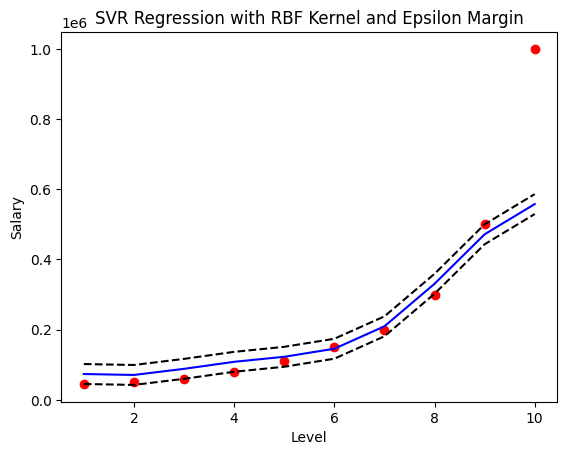

In [11]:
plt.scatter(ss_x.inverse_transform(X), ss_y.inverse_transform(y), color = 'red')
plt.plot(ss_x.inverse_transform(X), y_pred_all, color = 'blue', label='SVR regression line')
plt.plot(ss_x.inverse_transform(X), upper_margin, 'k--', label = 'Upper Margin')
plt.plot(ss_x.inverse_transform(X), lower_margin, 'k--', label = 'Lower Margin')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.title('SVR Regression with RBF Kernel and Epsilon Margin')
plt.show()

#### Smooth SVR Curve

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10784\2842976629.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(ss_x.inverse_transform(X)), max(ss_x.inverse_transform(X)), 0.1)


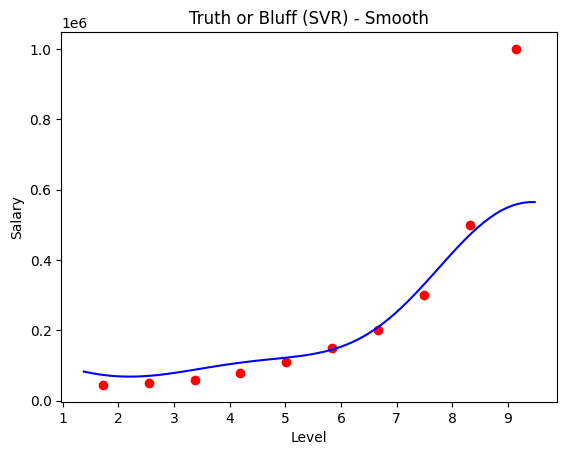

In [14]:
X_grid = np.arange(min(ss_x.inverse_transform(X)), max(ss_x.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
y_pred_grid_ss = regressor.predict(ss_x.fit_transform(X_grid))
y_pred_grid = ss_y.inverse_transform(y_pred_grid_ss.reshape(-1,1))

plt.scatter(ss_x.inverse_transform(X), ss_y.inverse_transform(y), color = 'red')
plt.plot(X_grid, y_pred_grid, color = 'blue', label='SVR regression line')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.title('Truth or Bluff (SVR) - Smooth')
plt.show()

#### SVR Hyperplane Curve - Smooth

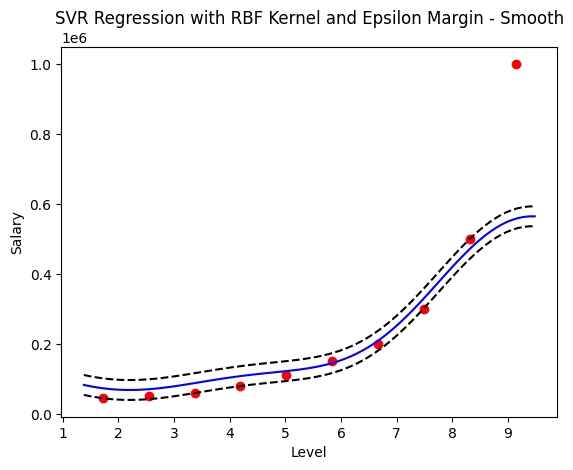

In [15]:
upper_margin_grid_ss = y_pred_grid_ss + ep
lower_margin_grid_ss = y_pred_grid_ss - ep
upper_margin_grid = ss_y.inverse_transform(upper_margin_grid_ss.reshape(-1, 1))
lower_margin_grid = ss_y.inverse_transform(lower_margin_grid_ss.reshape(-1, 1))

plt.scatter(ss_x.inverse_transform(X), ss_y.inverse_transform(y), color = 'red')
plt.plot(X_grid, y_pred_grid, color = 'blue', label='SVR regression line')
plt.plot(X_grid, upper_margin_grid, 'k--', label = 'Upper Margin')
plt.plot(X_grid, lower_margin_grid, 'k--', label = 'Lower Margin')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.title('SVR Regression with RBF Kernel and Epsilon Margin - Smooth')
plt.show()